# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [3]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    n = np.random.poisson(intensity*(x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0]))
    x = np.random.uniform(x_lim[0], x_lim[1], n)
    y = np.random.uniform(y_lim[0], y_lim[1], n)
    return pd.DataFrame({"X" : x, "Y" : y})

def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    margx = (x_lim[1] - x_lim[0])/grid[0]/2
    margy = (y_lim[1] - y_lim[0])/grid[1]/2
    xLin = np.linspace(x_lim[0] + margx, x_lim[1] - margx, num = grid[0])
    yLin = np.linspace(y_lim[0] + margy, y_lim[1] - margy, num = grid[1])
    x, y = np.meshgrid(xLin, yLin)
    x = x.flatten() + random_component*np.random.uniform(-margx, margx, grid[0]*grid[1])
    y = y.flatten() + random_component*np.random.uniform(-margy, margy, grid[0]*grid[1])
    return pd.DataFrame({"X" : x, "Y" : y})

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    a = (x_lim[1]-x_lim[0]+2*cluster_radius)*(y_lim[1]-y_lim[0]+2*cluster_radius)
    n_p = np.random.poisson(parent_intensity * a)
    x = np.random.uniform(x_lim[0]-cluster_radius, x_lim[1]+cluster_radius, n_p)
    y = np.random.uniform(y_lim[0]-cluster_radius, y_lim[1]+cluster_radius, n_p)
    
    a_2 = np.pi*cluster_radius**2;
    X, Y = [], []

    for x, y in zip(x, y):
        n_d = np.random.poisson(daughter_intensity * a_2)
        alpha = 2 * np.pi * np.random.random(n_d)
        r = cluster_radius * np.sqrt(np.random.random(n_d))
        X.extend(r * np.cos(alpha) + x)
        Y.extend(r * np.sin(alpha) + y)
    
    df = pd.DataFrame({"X" : X, "Y" : Y})
    return df[(df["X"] > x_lim[0]) & (df["X"] < x_lim[1]) & (df["Y"] > y_lim[0]) & (df["Y"] < y_lim[1])]

### Przygotowanie danych

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]
 
UWAGA! Dane do wygenerowania są identyczne jak w poprzednim zestawie zadań.

In [4]:
df1 = homogeneous_poisson_on_rectangle(2.5, [0, 10], [0, 10])
df2 = regular_on_rectangle([15, 15], 0.75, [0, 10], [0, 10])
df3 = materna_on_rectangle(0.3, 5, 0.75, [0, 10], [0, 10])

### Zadanie 1: Funkcja G (25 pkt)

Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona danej wzorem: <br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji G powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
2) Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.

#### a) Przygotowanie funkcji

In [5]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    d = sp.spatial.distance.cdist(points, points)
    d = np.sort(d, axis=0)
    d = np.sort(d[1,:])
    dUniq = np.unique(d)
    G = np.array([sum(d<=i) for i in dUniq])/len(d)
    d = dUniq
    d = np.insert(d, 0, 0)
    G = np.insert(G, 0, 0)
    return pd.DataFrame({"D" : d, "G" : G})

def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    G = 1 - np.exp(-intensity*np.pi*d**2)
    return pd.DataFrame({"D" : d, "G" : G})

#### b) Wygenerowanie danych

In [6]:
df1g = g_function(df1)
df2g = g_function(df2)
df3g = g_function(df3)
df1Pg = g_function_poisson(df1g['D'], 2.5)
df2Pg = g_function_poisson(df2g['D'], 2.5)
df3Pg = g_function_poisson(df3g['D'], 2.5)

#### c) Wizualizacja

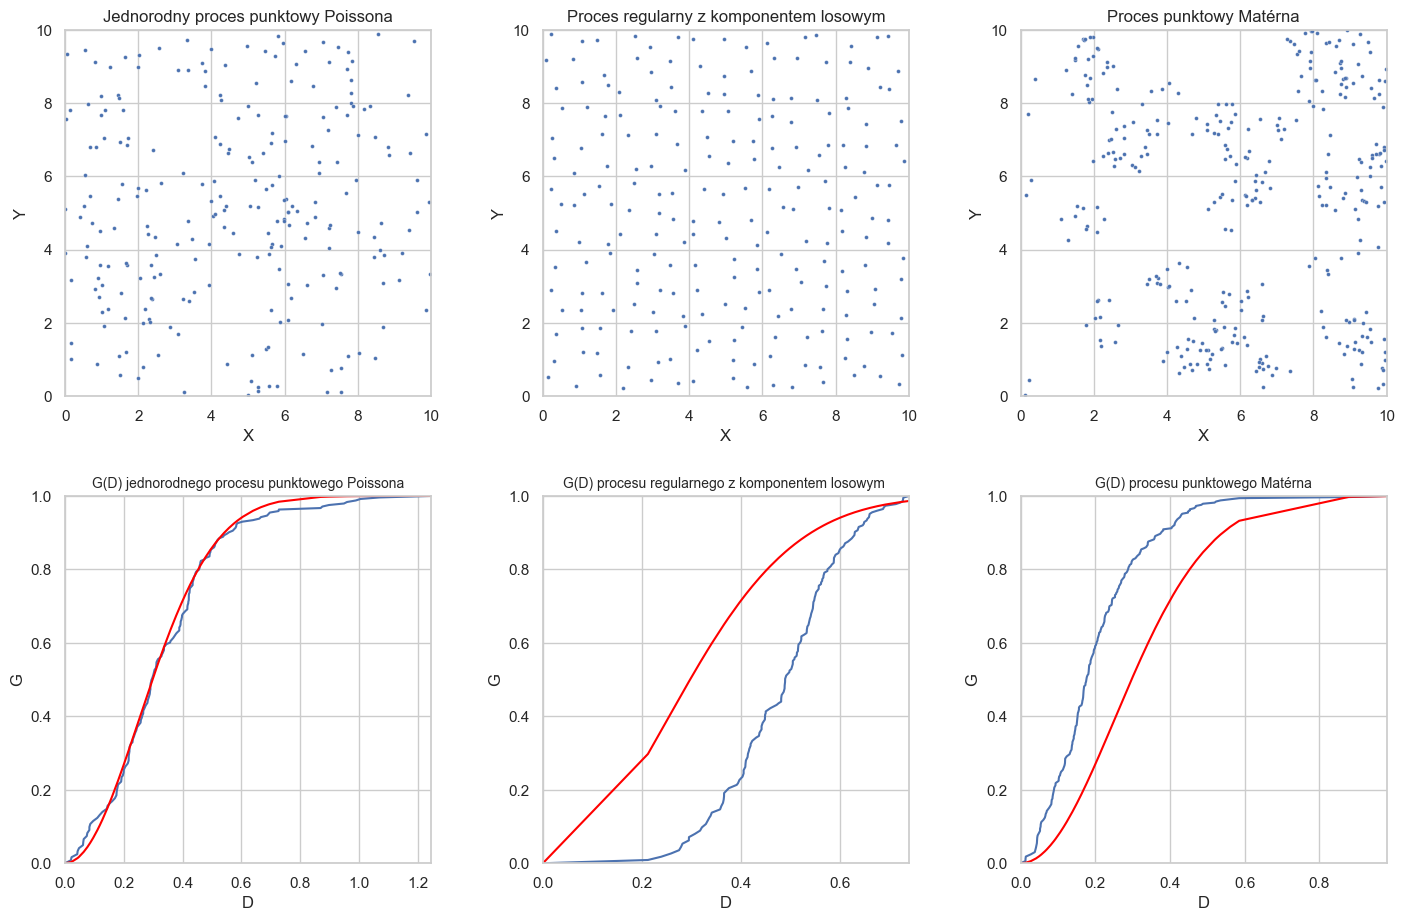

In [7]:
fig, axes = plt.subplots(2, 3, figsize = (15,10))
fig.tight_layout(pad=4.0)

sns.scatterplot(df1, x = "X", y = "Y", ax = axes[0][0], s = 8)
axes[0][0].axis('square')
axes[0][0].set_ylim([0,10]);
axes[0][0].set_xlim([0,10]);
axes[0][0].set_title("Jednorodny proces punktowy Poissona", fontsize = 12);

sns.scatterplot(df2, x = "X", y = "Y", ax = axes[0][1], s = 8)
axes[0][1].axis('square')
axes[0][1].set_ylim([0,10]);
axes[0][1].set_xlim([0,10]);
axes[0][1].set_title("Proces regularny z komponentem losowym", fontsize = 12);

sns.scatterplot(df3, x = "X", y = "Y", ax = axes[0][2], s = 8)
axes[0][2].axis('square')
axes[0][2].set_ylim([0,10]);
axes[0][2].set_xlim([0,10]);
axes[0][2].set_title("Proces punktowy Matérna", fontsize = 12);

sns.lineplot(df1g, x = "D", y = "G", ax = axes[1][0])
sns.lineplot(df1Pg, x = "D", y = "G", ax = axes[1][0], color = "red")
axes[1][0].set_ylim([0,1]);
axes[1][0].set_xlim([0,df1g['D'].max()]);
axes[1][0].set_title("G(D) jednorodnego procesu punktowego Poissona", fontsize = 10);

sns.lineplot(df2g, x = "D", y = "G", ax = axes[1][1])
sns.lineplot(df2Pg, x = "D", y = "G", ax = axes[1][1], color = "red")
axes[1][1].set_ylim([0,1]);
axes[1][1].set_xlim([0,df2g['D'].max()]);
axes[1][1].set_title("G(D) procesu regularnego z komponentem losowym ", fontsize = 10);

sns.lineplot(df3g, x = "D", y = "G", ax = axes[1][2])
sns.lineplot(df3Pg, x = "D", y = "G", ax = axes[1][2], color = "red")
axes[1][2].set_ylim([0,1]);
axes[1][2].set_xlim([0,df3g['D'].max()]);
axes[1][2].set_title("G(D) procesu punktowego Matérna", fontsize = 10);

### Zadanie 2: Funkcja F (25 pkt)

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona danej wzorem: <br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji F powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy w obrębie analizowanego rozkładu zestaw punktów pomiarowych.
2) Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
3) Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
    
Uwaga! Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

#### a) Przygotowanie funkcji

In [8]:
def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y".
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    d = sp.spatial.distance.cdist(points, test_points)
    d = np.sort(d, axis=0)
    d = np.sort(d[0,:])
    dUniq = np.unique(d)
    F = np.array([sum(d<=i) for i in dUniq])/len(d)
    d = dUniq
    d = np.insert(d, 0, 0)
    F = np.insert(F, 0, 0)
    return pd.DataFrame({"D" : d, "F" : F})
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    F = 1 - np.exp(-intensity*np.pi*d**2)
    return pd.DataFrame({"D" : d, "F" : F})

#### b) Wygenerowanie danych

In [9]:
dfR = regular_on_rectangle([50, 50], 0, [0, 10], [0, 10])
df1f = f_function(df1, dfR)
df2f = f_function(df2, dfR)
df3f = f_function(df3, dfR)
df1Pf = f_function_poisson(df1f['D'], 2.5)
df2Pf = f_function_poisson(df2f['D'], 2.5)
df3Pf = f_function_poisson(df3f['D'], 2.5)

#### c) Wizualizacja

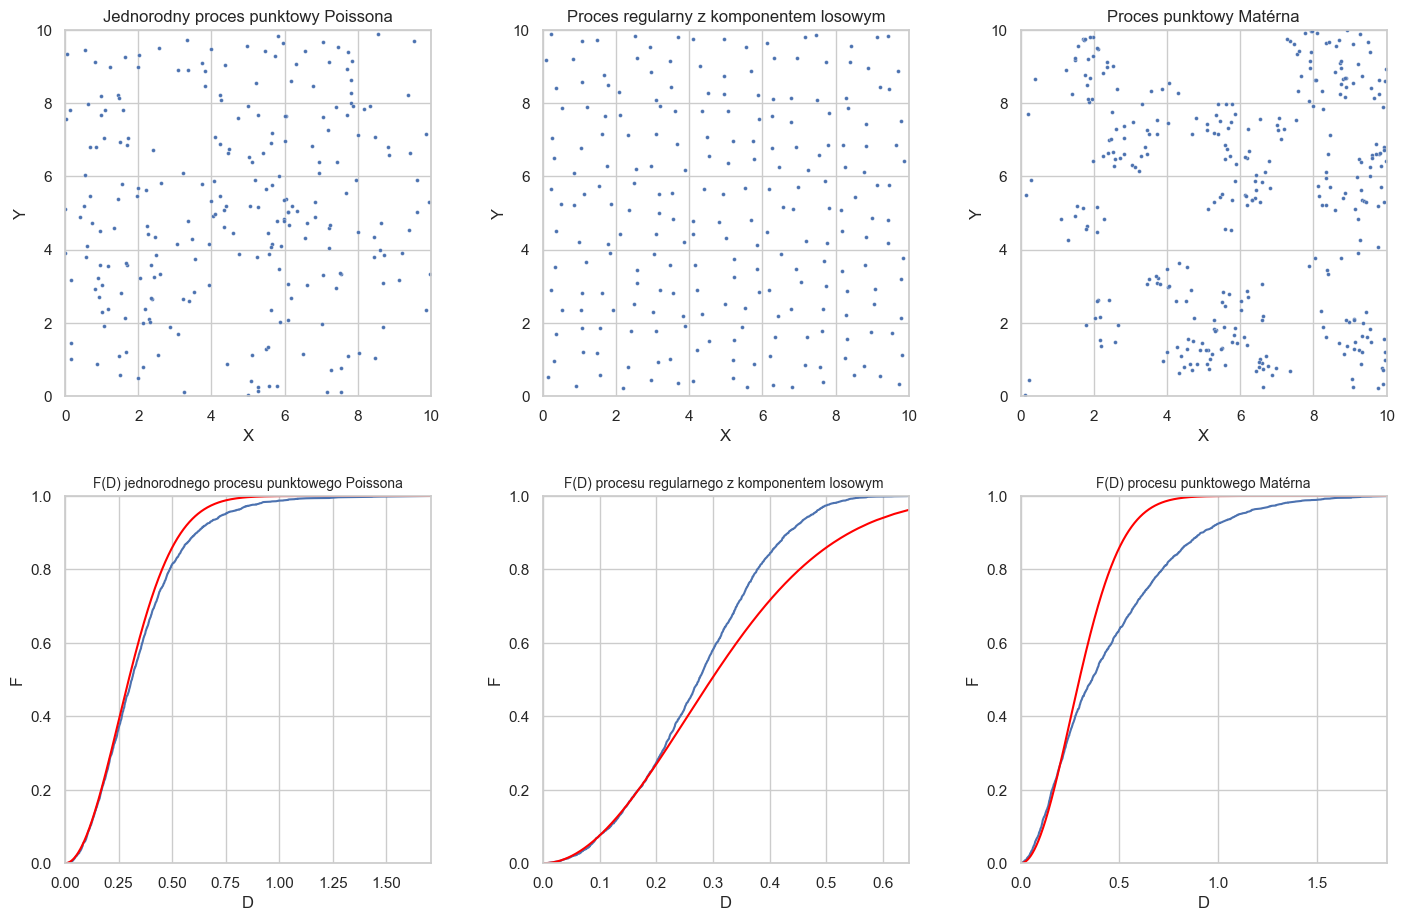

In [10]:
fig, axes = plt.subplots(2, 3, figsize = (15,10))
fig.tight_layout(pad=4.0)

sns.scatterplot(df1, x = "X", y = "Y", ax = axes[0][0], s = 8)
axes[0][0].axis('square')
axes[0][0].set_ylim([0,10]);
axes[0][0].set_xlim([0,10]);
axes[0][0].set_title("Jednorodny proces punktowy Poissona", fontsize = 12);

sns.scatterplot(df2, x = "X", y = "Y", ax = axes[0][1], s = 8)
axes[0][1].axis('square')
axes[0][1].set_ylim([0,10]);
axes[0][1].set_xlim([0,10]);
axes[0][1].set_title("Proces regularny z komponentem losowym", fontsize = 12);

sns.scatterplot(df3, x = "X", y = "Y", ax = axes[0][2], s = 8)
axes[0][2].axis('square')
axes[0][2].set_ylim([0,10]);
axes[0][2].set_xlim([0,10]);
axes[0][2].set_title("Proces punktowy Matérna", fontsize = 12);

sns.lineplot(df1f, x = "D", y = "F", ax = axes[1][0])
sns.lineplot(df1Pf, x = "D", y = "F", ax = axes[1][0], color = "red")
axes[1][0].set_ylim([0,1]);
axes[1][0].set_xlim([0,df1f['D'].max()]);
axes[1][0].set_title("F(D) jednorodnego procesu punktowego Poissona", fontsize = 10);

sns.lineplot(df2f, x = "D", y = "F", ax = axes[1][1])
sns.lineplot(df2Pf, x = "D", y = "F", ax = axes[1][1], color = "red")
axes[1][1].set_ylim([0,1]);
axes[1][1].set_xlim([0,df2f['D'].max()]);
axes[1][1].set_title("F(D) procesu regularnego z komponentem losowym ", fontsize = 10);

sns.lineplot(df3f, x = "D", y = "F", ax = axes[1][2])
sns.lineplot(df3Pf, x = "D", y = "F", ax = axes[1][2], color = "red")
axes[1][2].set_ylim([0,1]);
axes[1][2].set_xlim([0,df3f['D'].max()]);
axes[1][2].set_title("F(D) procesu punktowego Matérna", fontsize = 10);